In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(67)
points = np.random.uniform(size=(20, 2), low=-1, high=1)
positive = points[np.logical_xor(points[:, 0] >= 0, points[:, 1] >= 0)]
negative = points[np.logical_xor(points[:, 0] >= 0, points[:, 1] < 0)]
train_data = np.vstack([positive, negative])
train_labels = np.hstack([np.ones(positive.shape[0]), np.zeros(negative.shape[0])])

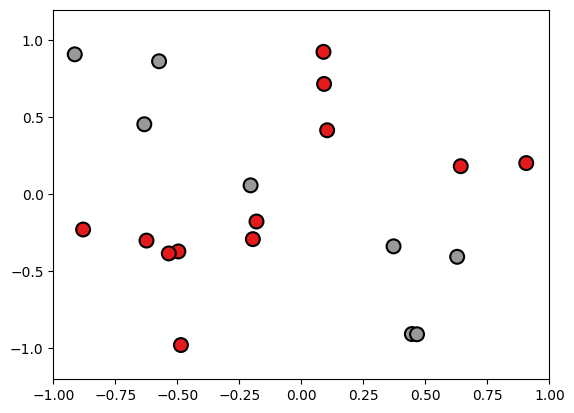

In [3]:
plt.scatter(train_data[:, 0], train_data[:, 1], 
            c=train_labels, s=100, cmap='Set1', edgecolors='black', linewidth=1.5)
plt.xlim(-1, 1)
plt.ylim(-1.2, 1.2)
plt.show()

In [4]:
X = np.c_[train_data, np.ones(train_data.shape[0])]
y = np.transpose(np.array([train_labels]))

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
theta0 = np.random.normal(size=(2,3))
theta1 = np.random.normal(size=(1,3))

In [7]:
h = sigmoid(np.dot(X, np.transpose(theta0)))

In [8]:
h = np.c_[h, np.ones(len(h))]

In [9]:
a = sigmoid(np.dot(h, np.transpose(theta1)))

In [10]:
def grad_theta1(y, a, h):
    return np.dot(np.transpose((a - y) * a * (1 - a)), h)

In [11]:
grad_theta1(y, a, h)

array([[-0.06627089, -0.12896787, -0.25245584]])

In [12]:
def grad_theta0(X, y, a, h, theta1):
    return np.dot(np.transpose(np.dot((a - y) * a * (1 - a), theta1) * h * (1 - h)), X)

In [13]:
grad_theta0(X, y, a, h, theta1)[:-1]

array([[ 0.00262954, -0.00439379, -0.02825215],
       [ 0.01107776, -0.01203478,  0.00849971]])

In [14]:
def grad_descent(X, y, theta_init, n=10000, eta=0.1):
    theta0, theta1 = theta_init
    loss = []
    for _ in range(n):
        h = sigmoid(np.dot(X, np.transpose(theta0)))
        h = np.c_[h, np.ones(len(h))]
        a = sigmoid(np.dot(h, np.transpose(theta1)))
        theta1 = theta1 - eta * grad_theta1(y, a, h)
        theta0 = theta0 - eta * grad_theta0(X, y, a, h, theta1)[:-1]
    return a

In [15]:
a = grad_descent(X, y, (theta0, theta1)).reshape(-1)
answer = np.array(a > 0.5, dtype=int)

In [16]:
mean_squared_error(answer, train_labels)

0.05

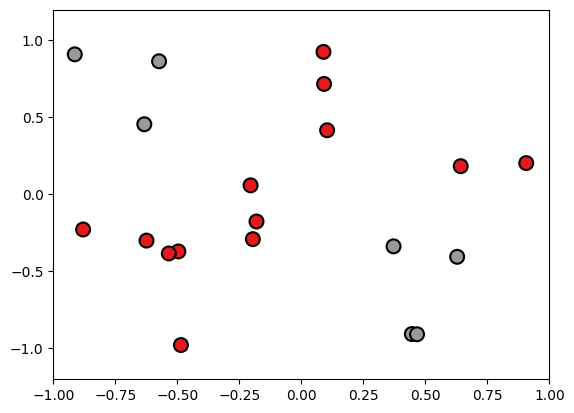

In [17]:
plt.scatter(train_data[:, 0], train_data[:, 1], 
            c=answer, s=100, cmap='Set1', edgecolors='black', linewidth=1.5)
plt.xlim(-1, 1)
plt.ylim(-1.2, 1.2)
plt.show()

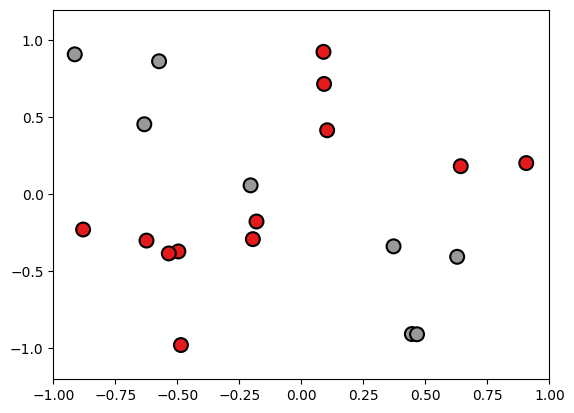

In [18]:
plt.scatter(train_data[:, 0], train_data[:, 1], 
            c=train_labels, s=100, cmap='Set1', edgecolors='black', linewidth=1.5)
plt.xlim(-1, 1)
plt.ylim(-1.2, 1.2)
plt.show()